# **Paul Golder - Capstone Project March 2025**

## Objectives

* This notebook will be used for the development and testing of Natural Language Processing on the Real or Fake news sets

## Inputs

* Input will be the cleaned, combined_data.csv - generated out of the Extract,Transform processes

## Outputs

* This book will be used to write a Python script that can be run against any text submitted and provide a confidence score if the text is Real news or Fake news.

## Additional Comments

* This is my first attempt at implementing NLP, and the core process outline has been taken from the Course's Scikit-learn - Topic 9.
* Coding assistance has been provided by CoPilot, and ChatGPT has been used for refactoring and tidying of code.

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'h:\\VScode\\CapStoneProject_2025-1\\6-nlp_data_processing'

In [2]:
# check current directory contains the file README.md
if os.path.exists("README.md"):
    print("The file README.md exists in the current directory")
else:
    print("The file README.md does not exist in the current directory")
    print("You are in the directory: ", current_dir)
    print("Changing current directory to its parent directory")
    os.chdir(os.path.dirname(current_dir))
    print("You set a new current directory")
    current_dir = os.getcwd()
    if os.path.exists("README.md"):
        print("The file README.md exists in the current directory")
    else:
        RuntimeError("The file README.md does not exist in the current directory, please check the current directory")
        print("Current Directory =", current_dir)

The file README.md does not exist in the current directory
You are in the directory:  h:\VScode\CapStoneProject_2025-1\6-nlp_data_processing
Changing current directory to its parent directory
You set a new current directory
The file README.md exists in the current directory


# NLP - based on course guidance

### Packages for NLP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from textblob import TextBlob

1- LoadData

In [17]:
Source_data = "data/combined_data.zip"

# Import source_data to a pandas DataFrame
import pandas as pd
source_df = pd.read_csv(Source_data)
source_df.head()


,title,subject,label,media_type,month,day,year,date_clean,day_of_week,week_of_year,...,day_of_month_cos,month_sin,month_cos,day_label,source,cleaned_text,location,source_name,title_length,text_length
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,1,twitter,12,31,2017,2017-12-31,Sunday,52,...,1.000000,-2.449294e-16,1.0,Sunday,WASHINGTON (Reuters) -,The head of a conservative Republican faction ...,['WASHINGTON'],Reuters,64,4635
1,U.S. military to accept transgender recruits o...,politicsNews,1,twitter,12,29,2017,2017-12-29,Friday,52,...,0.918958,-2.449294e-16,1.0,Friday,WASHINGTON (Reuters) -,Transgender people will be allowed for the fir...,['WASHINGTON'],Reuters,64,4053
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,1,text,12,31,2017,2017-12-31,Sunday,52,...,1.000000,-2.449294e-16,1.0,Sunday,WASHINGTON (Reuters) -,The special counsel investigation of links bet...,['WASHINGTON'],Reuters,60,2765
3,FBI Russia probe helped by Australian diplomat...,politicsNews,1,text,12,30,2017,2017-12-30,Saturday,52,...,0.979530,-2.449294e-16,1.0,Saturday,WASHINGTON (Reuters) -,Trump campaign adviser George Papadopoulos tol...,['WASHINGTON'],Reuters,59,2437
4,Trump wants Postal Service to charge 'much mor...,politicsNews,1,twitter,12,29,2017,2017-12-29,Friday,52,...,0.918958,-2.449294e-16,1.0,Friday,SEATTLE/WASHINGTON (Reuters) -,President Donald Trump called on the U.S. Post...,"['SEATTLE', 'WASHINGTON']",Reuters,69,5172


2- Split Data

(35882,) (35882,) (8971,) (8971,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from textblob import TextBlob

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(source_df['cleaned_text'], source_df['label'],
                                                    test_size=0.2, random_state=101)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


class text_cleaning(BaseEstimator, TransformerMixin):

    def __init__(self ):
        pass

    def fit(self, X, y=None):
        return self  # No fitting necessary, return self

    def transform(self, X):
        if isinstance(X, pd.Series):
            X = X.astype(str).fillna('')  # Convert to string and replace NaN with empty string
        else:
            X = pd.Series(X, dtype=str).fillna('')
        
        X = X.str.lower()  # Convert to lowercase
        X = X.str.replace(r"[^\w\s]", "", regex=True)  # Remove punctuation
        return X


def PipelineOptimization(model, params=None):
    pipeline = Pipeline([
        ('text_cleaning', text_cleaning()),
        ('vect', CountVectorizer(stop_words='english')),
        ('tfidf', TfidfTransformer()),
        ('model', model)
    ])
    
    if params:
        return GridSearchCV(pipeline, params, cv=2, n_jobs=-2, verbose=1, scoring='accuracy')
    
    return pipeline

class HyperparameterOptimizationSearch:
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model=  PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches


models_search = {
    #"MultinomialNB":MultinomialNB(),
    "SGDClassifier":SGDClassifier(random_state=101),
   # "SVC": SVC(random_state=101),
    "LinearSVC": LinearSVC(random_state=101),
}

params_search = {
   # "MultinomialNB":{},
    "SGDClassifier": {},
   # "SVC": {},
    "LinearSVC": {},
}


In [ ]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-2,
           cv=2)

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary


Running GridSearchCV for SGDClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for LinearSVC 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


h:\VScode\CapStoneProject_2025-1\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [24]:
##now to run the same on the title
X_train, X_test, y_train, y_test = train_test_split(source_df['title'], source_df['label'],
                                                    test_size=0.2, random_state=101)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-2,
           cv=2)

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary


(35882,) (35882,) (8971,) (8971,)

Running GridSearchCV for SGDClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for LinearSVC 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


h:\VScode\CapStoneProject_2025-1\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,estimator,min_score,mean_score,max_score,std_score
1,LinearSVC,0.939803,0.939886,0.93997,0.000084
0,SGDClassifier,0.937127,0.937824,0.938521,0.000697


---

In [25]:
#SGDClassifier has the lowest std_score for both sets - and was within 0.002 of the highest mean_score for both sets
#I will use this model for the final model

models_search = {
    #"MultinomialNB":MultinomialNB(),
    "SGDClassifier":SGDClassifier(random_state=101),
}

params_search = {
   # "MultinomialNB":{},
    "SGDClassifier": {'model__tol':[1e-2, 1e-1],},
}

search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-2,
           cv=2)

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary




Running GridSearchCV for SGDClassifier 

Fitting 2 folds for each of 2 candidates, totalling 4 fits


,estimator,min_score,mean_score,max_score,std_score,model__tol
0,SGDClassifier,0.937239,0.938075,0.938911,0.000836,0.01
1,SGDClassifier,0.936904,0.937796,0.938688,0.000892,0.1


In [ ]:
best_model = grid_search_summary.iloc[0,0]
best_model

In [39]:
# Altered version to support using both fields as inputs for the model

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, col1: str, col2: str):
        self.col1 = col1  # First text column
        self.col2 = col2  # Second text column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        # Ensure input is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a Pandas DataFrame")

        # Create a copy of the Dataframe to avoid SettingWithCopyWarning
        X = X.copy()

        # Convert both columns to string and handle NaN values
        X[self.col1] = X[self.col1].astype(str).fillna('')
        X[self.col2] = X[self.col2].astype(str).fillna('')

        # Convert to lowercase and remove punctuation
        X[self.col1] = X[self.col1].str.lower().str.replace(r"[^\w\s]", "", regex=True)
        X[self.col2] = X[self.col2].str.lower().str.replace(r"[^\w\s]", "", regex=True)

        # Concatenate both columns into a single text column
        X_combined = X[self.col1] + " " + X[self.col2]

        return X_combined  # Return single-column Pandas Series

def PipelineOptimization(model, col1: str, col2: str, params=None):
    pipeline = Pipeline([
        ('text_preprocessor', TextPreprocessor(col1, col2)),  # Process two columns
        ('vect', CountVectorizer(stop_words='english')),
        ('tfidf', TfidfTransformer()),
        ('model', model)
    ])

    if params and len(params) > 0:  # Ensure params are provided before using GridSearchCV
        return GridSearchCV(pipeline, params, cv=2, n_jobs=-2, verbose=1, scoring='accuracy')

    return pipeline  # Always return a pipeline, even if no params are given

class HyperparameterOptimizationSearch:
    def __init__(self, models, params, col1, col2):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
        self.col1 = col1
        self.col2 = col2

    def fit(self, X, y, cv=2, n_jobs=-2, verbose=1, scoring='accuracy', refit=True):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key], self.col1, self.col2, self.params[key])

            if isinstance(model, GridSearchCV):  # If GridSearchCV is used
                model.fit(X, y)
                self.grid_searches[key] = model  # Store GridSearchCV object
            else:  # If no parameter tuning, just fit normally
                model.fit(X, y)
                self.grid_searches[key] = model

    def score_summary(self, sort_by='mean_test_score'):
        rows = []
        for k in self.grid_searches:
            model = self.grid_searches[k]

            if isinstance(model, GridSearchCV):  # Only GridSearchCV has cv_results_
                df = pd.DataFrame(model.cv_results_)
                df['estimator'] = k
                rows.append(df)
            else:
                print(f"Warning: {k} is a Pipeline, not GridSearchCV. Skipping summary.")

        if len(rows) == 0:
            print("No GridSearchCV results found.")
            return None  # Return None if no summaries exist

        summary_df = pd.concat(rows)
        return summary_df.sort_values(by=sort_by, ascending=False)

models_search = {
    "SGDClassifier": SGDClassifier(random_state=101),
    "LinearSVC": LinearSVC(random_state=101),
}

params_search = {
    "SGDClassifier": {
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__loss': ['hinge', 'log_loss'],
    },
    "LinearSVC": {
        'model__C': [0.1, 1, 10],
        'model__max_iter': [1000, 5000],
    },
}

In [40]:
## try to run using both fields
# X_train, X_test, y_train, y_test = train_test_split(source_df[['title', 'cleaned_text']], source_df['label'],
#                                                     test_size=0.2, random_state=101)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

text_column_1 = 'title'
text_column_2 = 'cleaned_text'

search = HyperparameterOptimizationSearch(models=models_search, 
                                          params=params_search, 
                                          col1=text_column_1, 
                                          col2=text_column_2)

search.fit(source_df[[text_column_1, text_column_2]],  # Pass DataFrame with two columns
           source_df['label'],  
           scoring='accuracy', 
           n_jobs=-2, 
           cv=2)

grid_search_summary = search.score_summary()
if grid_search_summary is not None:
    print(grid_search_summary)


Running GridSearchCV for SGDClassifier 

Fitting 2 folds for each of 6 candidates, totalling 12 fits

Running GridSearchCV for LinearSVC 

Fitting 2 folds for each of 6 candidates, totalling 12 fits


h:\VScode\CapStoneProject_2025-1\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      12.344993      0.650197        10.761592        0.481054   
5      12.259472      0.218652        10.756034        0.404619   
2      13.764935      0.677232        12.796268        0.471375   
3      12.982246      0.303214        11.936898        1.466922   
0      13.633239      0.723497        13.187586        0.445748   
0      13.481916      0.659361        12.624320        0.589492   
1      13.655652      0.579924        12.832453        0.483824   
1      13.658610      0.689896        13.241238        0.468974   
2      13.547705      0.603155        13.478797        0.523583   
3      12.903444      0.068234        12.282153        2.071466   
5      11.855711      0.532718        10.414845        0.602537   
4      11.888674      0.551777        10.718329        0.460577   

  param_model__alpha param_model__loss  \
4                NaN               NaN   
5                NaN               NaN   
2 

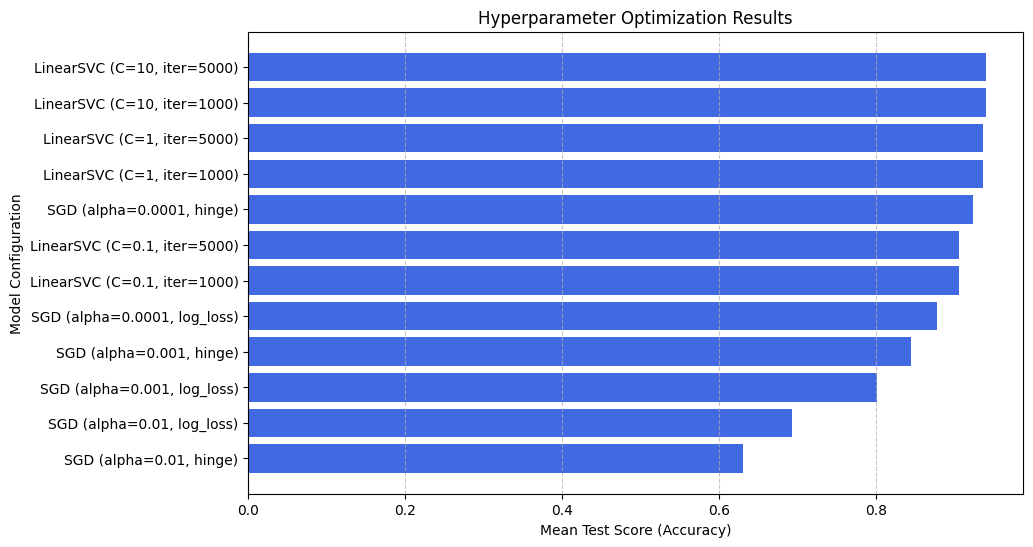

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Manually creating the DataFrame based on the user's provided output
data = {
    "Model": [
        "LinearSVC (C=10, iter=1000)", "LinearSVC (C=10, iter=5000)",
        "LinearSVC (C=1, iter=1000)", "LinearSVC (C=1, iter=5000)",
        "SGD (alpha=0.0001, hinge)", "LinearSVC (C=0.1, iter=1000)",
        "LinearSVC (C=0.1, iter=5000)", "SGD (alpha=0.0001, log_loss)",
        "SGD (alpha=0.001, hinge)", "SGD (alpha=0.001, log_loss)",
        "SGD (alpha=0.01, log_loss)", "SGD (alpha=0.01, hinge)"
    ],
    "Mean Test Score": [0.940963, 0.940963, 0.937106, 0.937106, 0.923997,
                        0.905938, 0.905938, 0.877512, 0.844538, 0.801442,
                        0.692686, 0.630438]
}

df = pd.DataFrame(data)

# Sorting by performance
df = df.sort_values(by="Mean Test Score", ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df["Model"], df["Mean Test Score"], color="royalblue")
plt.xlabel("Mean Test Score (Accuracy)")
plt.ylabel("Model Configuration")
plt.title("Hyperparameter Optimization Results")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



| Column                | Meaning                                                                 |
|-----------------------|-------------------------------------------------------------------------|
| mean_fit_time         | Average time taken to train the model per fold                          |
| std_fit_time          | Standard deviation of the training time (variation)                     |
| mean_score_time       | Average time taken to evaluate the model on validation data             |
| std_score_time        | Variation in score calculation time                                     |
| param_model__alpha    | Alpha (regularization) hyperparameter for SGDClassifier                 |
| param_model__loss     | Loss function (hinge or log_loss) for SGDClassifier                     |
| param_model__C        | Regularization strength for LinearSVC                                   |
| param_model__max_iter | Number of iterations for LinearSVC                                      |
| params                | Dictionary of all hyperparameters tested for a given model              |
| split0_test_score     | Accuracy score on first cross-validation split                          |
| split1_test_score     | Accuracy score on second cross-validation split                         |
| mean_test_score       | Average accuracy across all CV splits (this is what we use for model selection) |
| std_test_score        | Variation in accuracy scores (lower = more consistent performance)      |
| rank_test_score       | Rank of the model (1 = best performing)                                 |
| estimator             | The model used (SGDClassifier or LinearSVC)                             |

### Takeaways from the analysis

The best model was:
* LinearSVC with C=10, max_iter=1000
* SGDClassifier with alpha=0.0001, hinge was also a strong model

Avoid over-regularization:
* High alpha (SGDClassifier) or low C (LinearSVC) were the worst performing models
* Alpha = 0.01 and C=0.1 performed significantly worse

Opportunities for Fine Tuning:
* It may be worth running a test with C values of 50 or 100
* Add more cross-validation folds to ensure stability

## Using NLP to search title and cleaned_text to extract a location

In [42]:
import spacy

def extract_locations(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return locations

# create column with locations
source_df['locations'] = source_df['cleaned_text'].apply(extract_locations)

# produce a visualisation of the most common locations
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

locations = source_df['locations'].explode().dropna()
location_counts = Counter(locations)

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(location_counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



KeyboardInterrupt: 